In [1]:
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import pickle
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/fuel-consumption.xlsx',na_values='?')
df.head()

,car name,cylinders,displacement,horsepower,weight,model year,kml
0,Hyundai Stargazer,4,1497,113.4,1191.0,22,12.04
1,Toyota Avanza Veloz 1.3 MT,4,1329,95.0,1045.0,22,14.60
2,mitsubishi Xpander,4,1499,104.0,1780.0,20,11.80
3,toyoya raize 1.0L Turbo,3,998,97.0,1255.0,21,11.50
4,toyota gr yaris,3,1618,257.0,1280.0,20,10.00


In [3]:
df.dropna(inplace=True)

In [4]:
df['car name'].unique()

array(['Hyundai Stargazer', 'Toyota Avanza Veloz 1.3 MT',
       'mitsubishi Xpander', 'toyoya raize 1.0L Turbo', 'toyota gr yaris',
       'Hyundai Santa Fe CRDi', 'Tiggo 7 Pro', 'Wuling Almaz RS',
       'honda civic rs', 'all new suzuki ertiga',
       'nissan serena c26 facelift', 'honda hrv type SE', 'Hyundai Creta',
       'toyota avanza', 'lexus rx200t', 'suzuki xl7 alpha AT',
       'honda br-v', 'nissan grand livina l11 2014', 'agya mt',
       'daihatsu xenia li 1.0', 'all new pajero sport dakar 2017',
       'toyota kijang kapsul lgx 1.8l EFI', ' ISUZU MU-X 2019',
       'toyota innova reborn 2.4 V', 'DFSK Glory i-Auto',
       'Daihatsu Sigra 1.2', 'Datsun GO AT', 'Datsun GO Cross',
       'Honda Accord Turbo', 'KIA Picanto', 'Mitsubishi Eclipse Cross',
       'Suzuki Swift', 'All new Toyota Fortuner ', 'Toyota C-HR',
       'toyota corona mark ii', 'ford f250', 'maxda glc deluxe',
       'dodge colt hatchback custom', 'amc spirit dl',
       'mercedes benz 300d', 'cadillac

In [5]:
df.drop(['car name'],axis=1,inplace=True)

In [6]:
x = df.drop('kml',axis=1)
Y = df['kml']
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=101)

In [7]:
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [8]:
pickle.dump(sc, open(r'scaler.pkl', 'wb'))

In [9]:
model = Sequential()

model.add(Dense(units = 64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [10]:
model_history=model.fit(x_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 1s 3ms/step - loss: 177.5908 - mean_absolute_error: 13.0490 - mean_squared_error: 177.5908
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 175.0024 - mean_absolute_error: 12.9466 - mean_squared_error: 175.0024
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 172.1839 - mean_absolute_error: 12.8335 - mean_squared_error: 172.1839
Epoch 4/1000
2/2 [==============================] - 0s 6ms/step - loss: 169.1480 - mean_absolute_error: 12.7105 - mean_squared_error: 169.1480
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 165.5981 - mean_absolute_error: 12.5638 - mean_squared_error: 165.5981
Epoch 6/1000
2/2 [==============================] - 0s 5ms/step - loss: 161.3925 - mean_absolute_error: 12.3891 - mean_squared_error: 161.3925
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 156.5377 - mean_absolute_error: 12.1828 - mean_squared_error: 156.5377

2/2 [==============================] - 0s 4ms/step - loss: 5.9817 - mean_absolute_error: 1.7862 - mean_squared_error: 5.9817
Epoch 60/1000
2/2 [==============================] - 0s 5ms/step - loss: 5.8824 - mean_absolute_error: 1.7686 - mean_squared_error: 5.8824
Epoch 61/1000
2/2 [==============================] - 0s 3ms/step - loss: 5.8301 - mean_absolute_error: 1.7613 - mean_squared_error: 5.8301
Epoch 62/1000
2/2 [==============================] - 0s 5ms/step - loss: 5.7697 - mean_absolute_error: 1.7543 - mean_squared_error: 5.7697
Epoch 63/1000
2/2 [==============================] - 0s 3ms/step - loss: 5.7061 - mean_absolute_error: 1.7448 - mean_squared_error: 5.7061
Epoch 64/1000
2/2 [==============================] - 0s 4ms/step - loss: 5.6492 - mean_absolute_error: 1.7334 - mean_squared_error: 5.6492
Epoch 65/1000
2/2 [==============================] - 0s 2ms/step - loss: 5.5905 - mean_absolute_error: 1.7267 - mean_squared_error: 5.5905
Epoch 66/1000
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 4.1870 - mean_absolute_error: 1.4252 - mean_squared_error: 4.1870
Epoch 118/1000
2/2 [==============================] - 0s 5ms/step - loss: 4.1866 - mean_absolute_error: 1.4338 - mean_squared_error: 4.1866
Epoch 119/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.1827 - mean_absolute_error: 1.4382 - mean_squared_error: 4.1827
Epoch 120/1000
2/2 [==============================] - 0s 6ms/step - loss: 4.1968 - mean_absolute_error: 1.4457 - mean_squared_error: 4.1968
Epoch 121/1000
2/2 [==============================] - 0s 6ms/step - loss: 4.2621 - mean_absolute_error: 1.4661 - mean_squared_error: 4.2621
Epoch 122/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.3262 - mean_absolute_error: 1.4835 - mean_squared_error: 4.3262
Epoch 123/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.2571 - mean_absolute_error: 1.4710 - mean_squared_error: 4.2571
Epoch 124/1000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 3.4455 - mean_absolute_error: 1.2717 - mean_squared_error: 3.4455
Epoch 176/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.4168 - mean_absolute_error: 1.2757 - mean_squared_error: 3.4168
Epoch 177/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.4114 - mean_absolute_error: 1.2759 - mean_squared_error: 3.4114
Epoch 178/1000
2/2 [==============================] - 0s 7ms/step - loss: 3.4092 - mean_absolute_error: 1.2783 - mean_squared_error: 3.4092
Epoch 179/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.3935 - mean_absolute_error: 1.2761 - mean_squared_error: 3.3935
Epoch 180/1000
2/2 [==============================] - 0s 6ms/step - loss: 3.3827 - mean_absolute_error: 1.2719 - mean_squared_error: 3.3827
Epoch 181/1000
2/2 [==============================] - 0s 8ms/step - loss: 3.3996 - mean_absolute_error: 1.2675 - mean_squared_error: 3.3996
Epoch 182/1000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 3.2606 - mean_absolute_error: 1.2514 - mean_squared_error: 3.2606
Epoch 234/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.2105 - mean_absolute_error: 1.2254 - mean_squared_error: 3.2105
Epoch 235/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.1310 - mean_absolute_error: 1.2035 - mean_squared_error: 3.1310
Epoch 236/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.1172 - mean_absolute_error: 1.2051 - mean_squared_error: 3.1172
Epoch 237/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.1380 - mean_absolute_error: 1.2144 - mean_squared_error: 3.1380
Epoch 238/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.0530 - mean_absolute_error: 1.2023 - mean_squared_error: 3.0530
Epoch 239/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.0127 - mean_absolute_error: 1.1830 - mean_squared_error: 3.0127
Epoch 240/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 2.8698 - mean_absolute_error: 1.1287 - mean_squared_error: 2.8698
Epoch 292/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.8389 - mean_absolute_error: 1.1330 - mean_squared_error: 2.8389
Epoch 293/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.8418 - mean_absolute_error: 1.1425 - mean_squared_error: 2.8418
Epoch 294/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8642 - mean_absolute_error: 1.1536 - mean_squared_error: 2.8642
Epoch 295/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8035 - mean_absolute_error: 1.1566 - mean_squared_error: 2.8035
Epoch 296/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.8255 - mean_absolute_error: 1.1719 - mean_squared_error: 2.8255
Epoch 297/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.8029 - mean_absolute_error: 1.1619 - mean_squared_error: 2.8029
Epoch 298/1000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 2.5914 - mean_absolute_error: 1.0764 - mean_squared_error: 2.5914
Epoch 350/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.5826 - mean_absolute_error: 1.0748 - mean_squared_error: 2.5826
Epoch 351/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.5789 - mean_absolute_error: 1.0781 - mean_squared_error: 2.5789
Epoch 352/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.5499 - mean_absolute_error: 1.0760 - mean_squared_error: 2.5499
Epoch 353/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.5544 - mean_absolute_error: 1.0905 - mean_squared_error: 2.5544
Epoch 354/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.5846 - mean_absolute_error: 1.1034 - mean_squared_error: 2.5846
Epoch 355/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.7046 - mean_absolute_error: 1.1458 - mean_squared_error: 2.7046
Epoch 356/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 3.1488 - mean_absolute_error: 1.3824 - mean_squared_error: 3.1488
Epoch 408/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.1212 - mean_absolute_error: 1.3635 - mean_squared_error: 3.1212
Epoch 409/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.5125 - mean_absolute_error: 1.1615 - mean_squared_error: 2.5125
Epoch 410/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.2902 - mean_absolute_error: 1.0536 - mean_squared_error: 2.2902
Epoch 411/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.5394 - mean_absolute_error: 1.1491 - mean_squared_error: 2.5394
Epoch 412/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.6623 - mean_absolute_error: 1.1927 - mean_squared_error: 2.6623
Epoch 413/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4417 - mean_absolute_error: 1.0971 - mean_squared_error: 2.4417
Epoch 414/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 2.2521 - mean_absolute_error: 1.0778 - mean_squared_error: 2.2521
Epoch 466/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.2050 - mean_absolute_error: 1.0457 - mean_squared_error: 2.2050
Epoch 467/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1880 - mean_absolute_error: 1.0358 - mean_squared_error: 2.1880
Epoch 468/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.2054 - mean_absolute_error: 1.0431 - mean_squared_error: 2.2054
Epoch 469/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.1457 - mean_absolute_error: 1.0131 - mean_squared_error: 2.1457
Epoch 470/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.0860 - mean_absolute_error: 0.9935 - mean_squared_error: 2.0860
Epoch 471/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.0871 - mean_absolute_error: 1.0011 - mean_squared_error: 2.0871
Epoch 472/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.8338 - mean_absolute_error: 0.9478 - mean_squared_error: 1.8338
Epoch 524/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8361 - mean_absolute_error: 0.9541 - mean_squared_error: 1.8361
Epoch 525/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9550 - mean_absolute_error: 0.9918 - mean_squared_error: 1.9550
Epoch 526/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.9865 - mean_absolute_error: 1.0000 - mean_squared_error: 1.9865
Epoch 527/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9274 - mean_absolute_error: 0.9762 - mean_squared_error: 1.9274
Epoch 528/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.8965 - mean_absolute_error: 0.9649 - mean_squared_error: 1.8965
Epoch 529/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.9004 - mean_absolute_error: 0.9623 - mean_squared_error: 1.9004
Epoch 530/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.8613 - mean_absolute_error: 0.9770 - mean_squared_error: 1.8613
Epoch 582/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.7742 - mean_absolute_error: 0.9504 - mean_squared_error: 1.7742
Epoch 583/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.7290 - mean_absolute_error: 0.9464 - mean_squared_error: 1.7290
Epoch 584/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.6844 - mean_absolute_error: 0.9148 - mean_squared_error: 1.6844
Epoch 585/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.6948 - mean_absolute_error: 0.9234 - mean_squared_error: 1.6948
Epoch 586/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.6459 - mean_absolute_error: 0.9175 - mean_squared_error: 1.6459
Epoch 587/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.6666 - mean_absolute_error: 0.9512 - mean_squared_error: 1.6666
Epoch 588/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1.4630 - mean_absolute_error: 0.8808 - mean_squared_error: 1.4630
Epoch 640/1000
2/2 [==============================] - 0s 1ms/step - loss: 1.5519 - mean_absolute_error: 0.9000 - mean_squared_error: 1.5519
Epoch 641/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.5718 - mean_absolute_error: 0.8922 - mean_squared_error: 1.5718
Epoch 642/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.5132 - mean_absolute_error: 0.8687 - mean_squared_error: 1.5132
Epoch 643/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.5025 - mean_absolute_error: 0.8925 - mean_squared_error: 1.5025
Epoch 644/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.5727 - mean_absolute_error: 0.9337 - mean_squared_error: 1.5727
Epoch 645/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.4547 - mean_absolute_error: 0.8752 - mean_squared_error: 1.4547
Epoch 646/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1.3970 - mean_absolute_error: 0.8898 - mean_squared_error: 1.3970
Epoch 698/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.2700 - mean_absolute_error: 0.8189 - mean_squared_error: 1.2700
Epoch 699/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1939 - mean_absolute_error: 0.7853 - mean_squared_error: 1.1939
Epoch 700/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2468 - mean_absolute_error: 0.8296 - mean_squared_error: 1.2468
Epoch 701/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.3287 - mean_absolute_error: 0.8722 - mean_squared_error: 1.3287
Epoch 702/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2225 - mean_absolute_error: 0.8153 - mean_squared_error: 1.2225
Epoch 703/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2073 - mean_absolute_error: 0.7877 - mean_squared_error: 1.2073
Epoch 704/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.1118 - mean_absolute_error: 0.7665 - mean_squared_error: 1.1118
Epoch 756/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1639 - mean_absolute_error: 0.7793 - mean_squared_error: 1.1639
Epoch 757/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1956 - mean_absolute_error: 0.7812 - mean_squared_error: 1.1956
Epoch 758/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.2336 - mean_absolute_error: 0.7896 - mean_squared_error: 1.2336
Epoch 759/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1804 - mean_absolute_error: 0.7671 - mean_squared_error: 1.1804
Epoch 760/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.1598 - mean_absolute_error: 0.7782 - mean_squared_error: 1.1598
Epoch 761/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.3259 - mean_absolute_error: 0.8701 - mean_squared_error: 1.3259
Epoch 762/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1.0748 - mean_absolute_error: 0.7973 - mean_squared_error: 1.0748
Epoch 814/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.0181 - mean_absolute_error: 0.7642 - mean_squared_error: 1.0181
Epoch 815/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.1135 - mean_absolute_error: 0.7694 - mean_squared_error: 1.1135
Epoch 816/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.1176 - mean_absolute_error: 0.7841 - mean_squared_error: 1.1176
Epoch 817/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9804 - mean_absolute_error: 0.7239 - mean_squared_error: 0.9804
Epoch 818/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0177 - mean_absolute_error: 0.7350 - mean_squared_error: 1.0177
Epoch 819/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.9975 - mean_absolute_error: 0.7360 - mean_squared_error: 0.9975
Epoch 820/1000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 1.0050 - mean_absolute_error: 0.7309 - mean_squared_error: 1.0050
Epoch 872/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0221 - mean_absolute_error: 0.7360 - mean_squared_error: 1.0221
Epoch 873/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9177 - mean_absolute_error: 0.6940 - mean_squared_error: 0.9177
Epoch 874/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.8855 - mean_absolute_error: 0.6725 - mean_squared_error: 0.8855
Epoch 875/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.1100 - mean_absolute_error: 0.7567 - mean_squared_error: 1.1100
Epoch 876/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0415 - mean_absolute_error: 0.7387 - mean_squared_error: 1.0415
Epoch 877/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8981 - mean_absolute_error: 0.6701 - mean_squared_error: 0.8981
Epoch 878/1000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.9113 - mean_absolute_error: 0.6760 - mean_squared_error: 0.9113
Epoch 930/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.9717 - mean_absolute_error: 0.6908 - mean_squared_error: 0.9717
Epoch 931/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8534 - mean_absolute_error: 0.6506 - mean_squared_error: 0.8534
Epoch 932/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7814 - mean_absolute_error: 0.6151 - mean_squared_error: 0.7814
Epoch 933/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8045 - mean_absolute_error: 0.6171 - mean_squared_error: 0.8045
Epoch 934/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8463 - mean_absolute_error: 0.6348 - mean_squared_error: 0.8463
Epoch 935/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8391 - mean_absolute_error: 0.6312 - mean_squared_error: 0.8391
Epoch 936/1000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 1.0265 - mean_absolute_error: 0.7364 - mean_squared_error: 1.0265
Epoch 988/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9813 - mean_absolute_error: 0.6985 - mean_squared_error: 0.9813
Epoch 989/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9193 - mean_absolute_error: 0.6578 - mean_squared_error: 0.9193
Epoch 990/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9091 - mean_absolute_error: 0.6557 - mean_squared_error: 0.9091
Epoch 991/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8512 - mean_absolute_error: 0.6268 - mean_squared_error: 0.8512
Epoch 992/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8195 - mean_absolute_error: 0.6061 - mean_squared_error: 0.8195
Epoch 993/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8810 - mean_absolute_error: 0.6634 - mean_squared_error: 0.8810
Epoch 994/1000
2/2 [===============

1/1 [==============================] - 0s 91ms/step


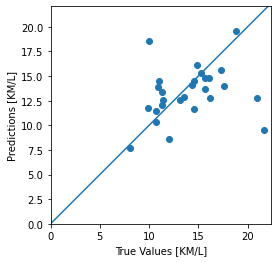

In [11]:
prediction = model.predict(x_test_std)
plt.scatter(Y_test,prediction)
plt.xlabel('True Values [KM/L]')
plt.ylabel('Predictions [KM/L]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [12]:
model.save(r'model.h5')

In [13]:
df.head()

,cylinders,displacement,horsepower,weight,model year,kml
0,4,1497,113.4,1191.0,22,12.04
1,4,1329,95.0,1045.0,22,14.60
2,4,1499,104.0,1780.0,20,11.80
3,3,998,97.0,1255.0,21,11.50
4,3,1618,257.0,1280.0,20,10.00


In [14]:
testing = [[6, 3346, 300.8, 2620, 22]]
testing = sc.transform(testing)
testing

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.94238094,  1.52276599,  5.37115304,  0.58567279, -1.49149031]])

In [15]:
prediction = model.predict(testing)
prediction

1/1 [==============================] - 0s 15ms/step


array([[10.519241]], dtype=float32)